In [39]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150

In [40]:
import time
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import ks_2samp
from scipy.special import factorial

In [41]:
from exopop import Simulator, data, abcmodel

In [43]:
NMAX = 20
PERIOD_RNG = (5, 300.)
RADIUS_RNG = (0.5, 12.)
MESTHRESH = 15.0

# Get the datasets.
stlr = data.get_burke_gk()
kois = data.get_candidates(stlr, period_range=PERIOD_RNG, radius_range=RADIUS_RNG, mesthresh=MESTHRESH)
dataset = abcmodel.RealDataset(stlr, kois, NMAX)

print("Selected {0} targets after cuts".format(len(stlr)))
print("Selected {0} KOIs after cuts".format(len(kois)))
print("Observed multiplicity distribution: {0}".format(dataset.multiplicity))

Selected 94255 targets after cuts
Selected 1149 KOIs after cuts
Observed multiplicity distribution: [93334   743   135    38     4     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


[  1.00828359e-03   8.98478449e-01   1.49378023e+01  -1.22364781e-01]


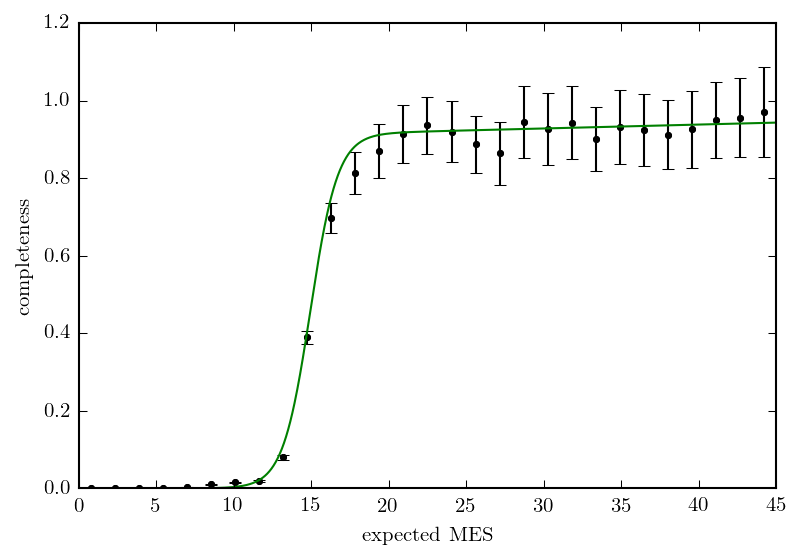

In [44]:
params, _ = data.calibrate_completeness(stlr, period_range=PERIOD_RNG, plot=True)
print(params)

In [45]:
strt = time.time()
sim = Simulator(stlr, NMAX, RADIUS_RNG[0], RADIUS_RNG[1],
                PERIOD_RNG[0], PERIOD_RNG[1], params)
print("Simulator setup took {0} seconds".format(time.time() - strt))

Simulator setup took 104.16397714614868 seconds


In [47]:
pars = np.array([
    -2.2, np.log(3.0),     # multiplicity
    -2.0, -4, 3.0,         # radius
    0.1, -0.65, 13.0,      # period
    np.log(1.0)            # inclination
])

model = abcmodel.ExopopABCModel(sim, dataset)

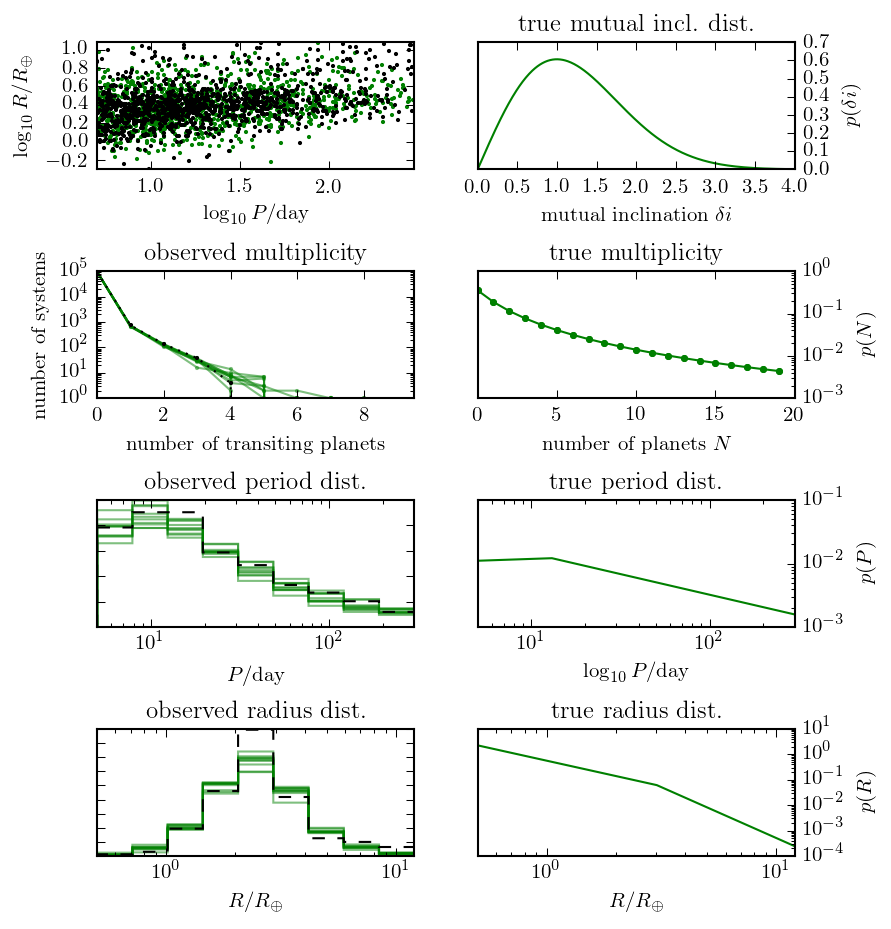

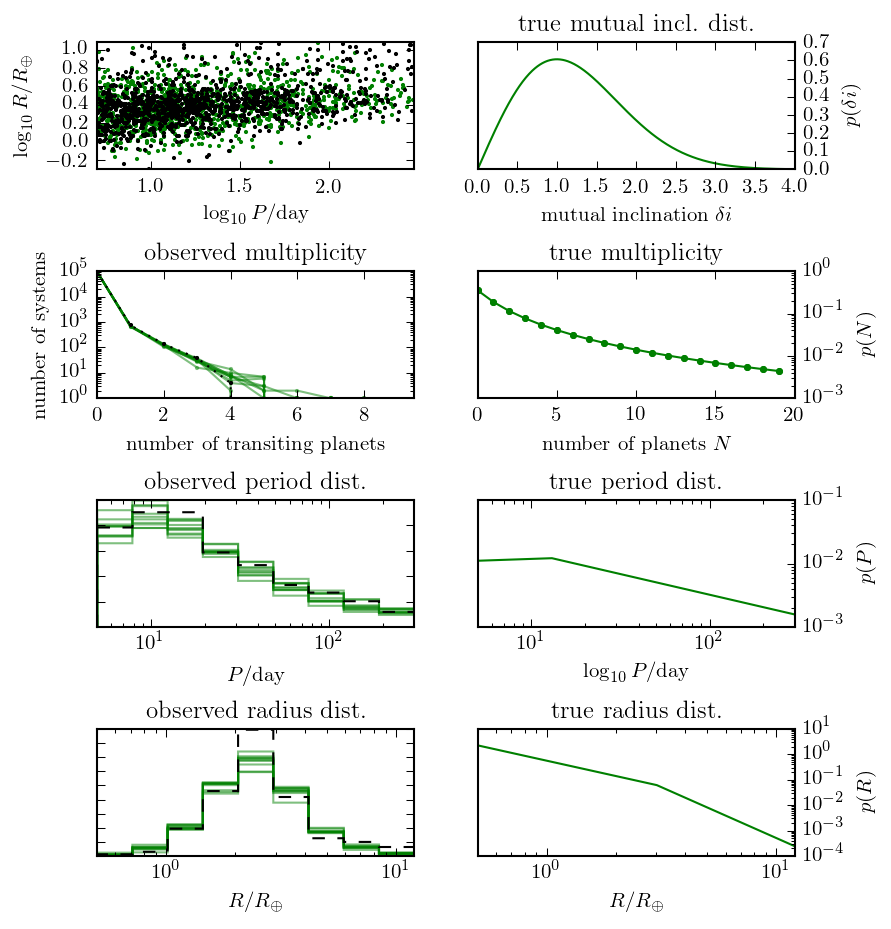

In [49]:
model.plot(pars, nsamps=10)

In [8]:
state = model.simulator.get_state()
sim_data = model.get_simulated_dataset(pars, state)
sim_model = abcmodel.ExopopABCModel(sim, sim_data)

In [9]:
state = sim_model.simulator.get_state()
nld = sim_model.negative_log_distance(pars, state=state)
print(nld)

-11.7628974906


In [18]:
p0 = pars + 1e-8 * np.random.randn(64, len(pars))
thetas, states, nlds = sim_model.sample(100, p0)

In [33]:
inds = np.unravel_index(np.argsort(nlds.flatten()), nlds.shape)
thetas, states, nlds = sim_model.sample(100, thetas[-1], states[-1])

In [38]:
nlds.max()

-8.1277442974056555

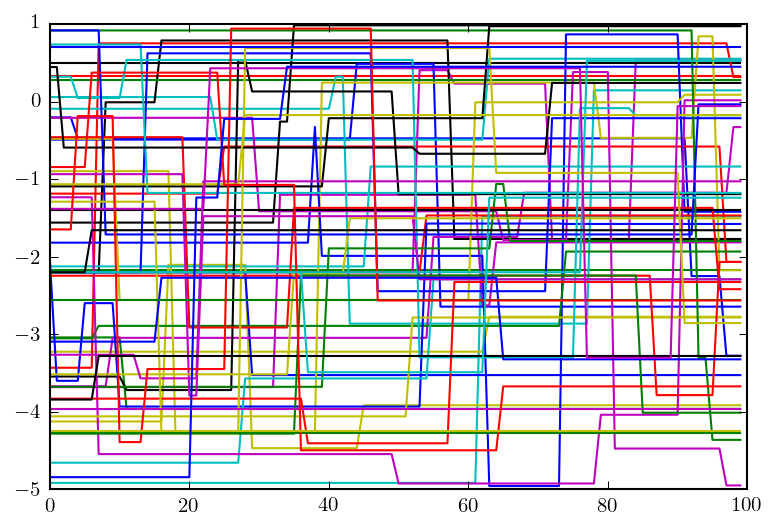

In [35]:
pl.plot(thetas[:, :, 0]);

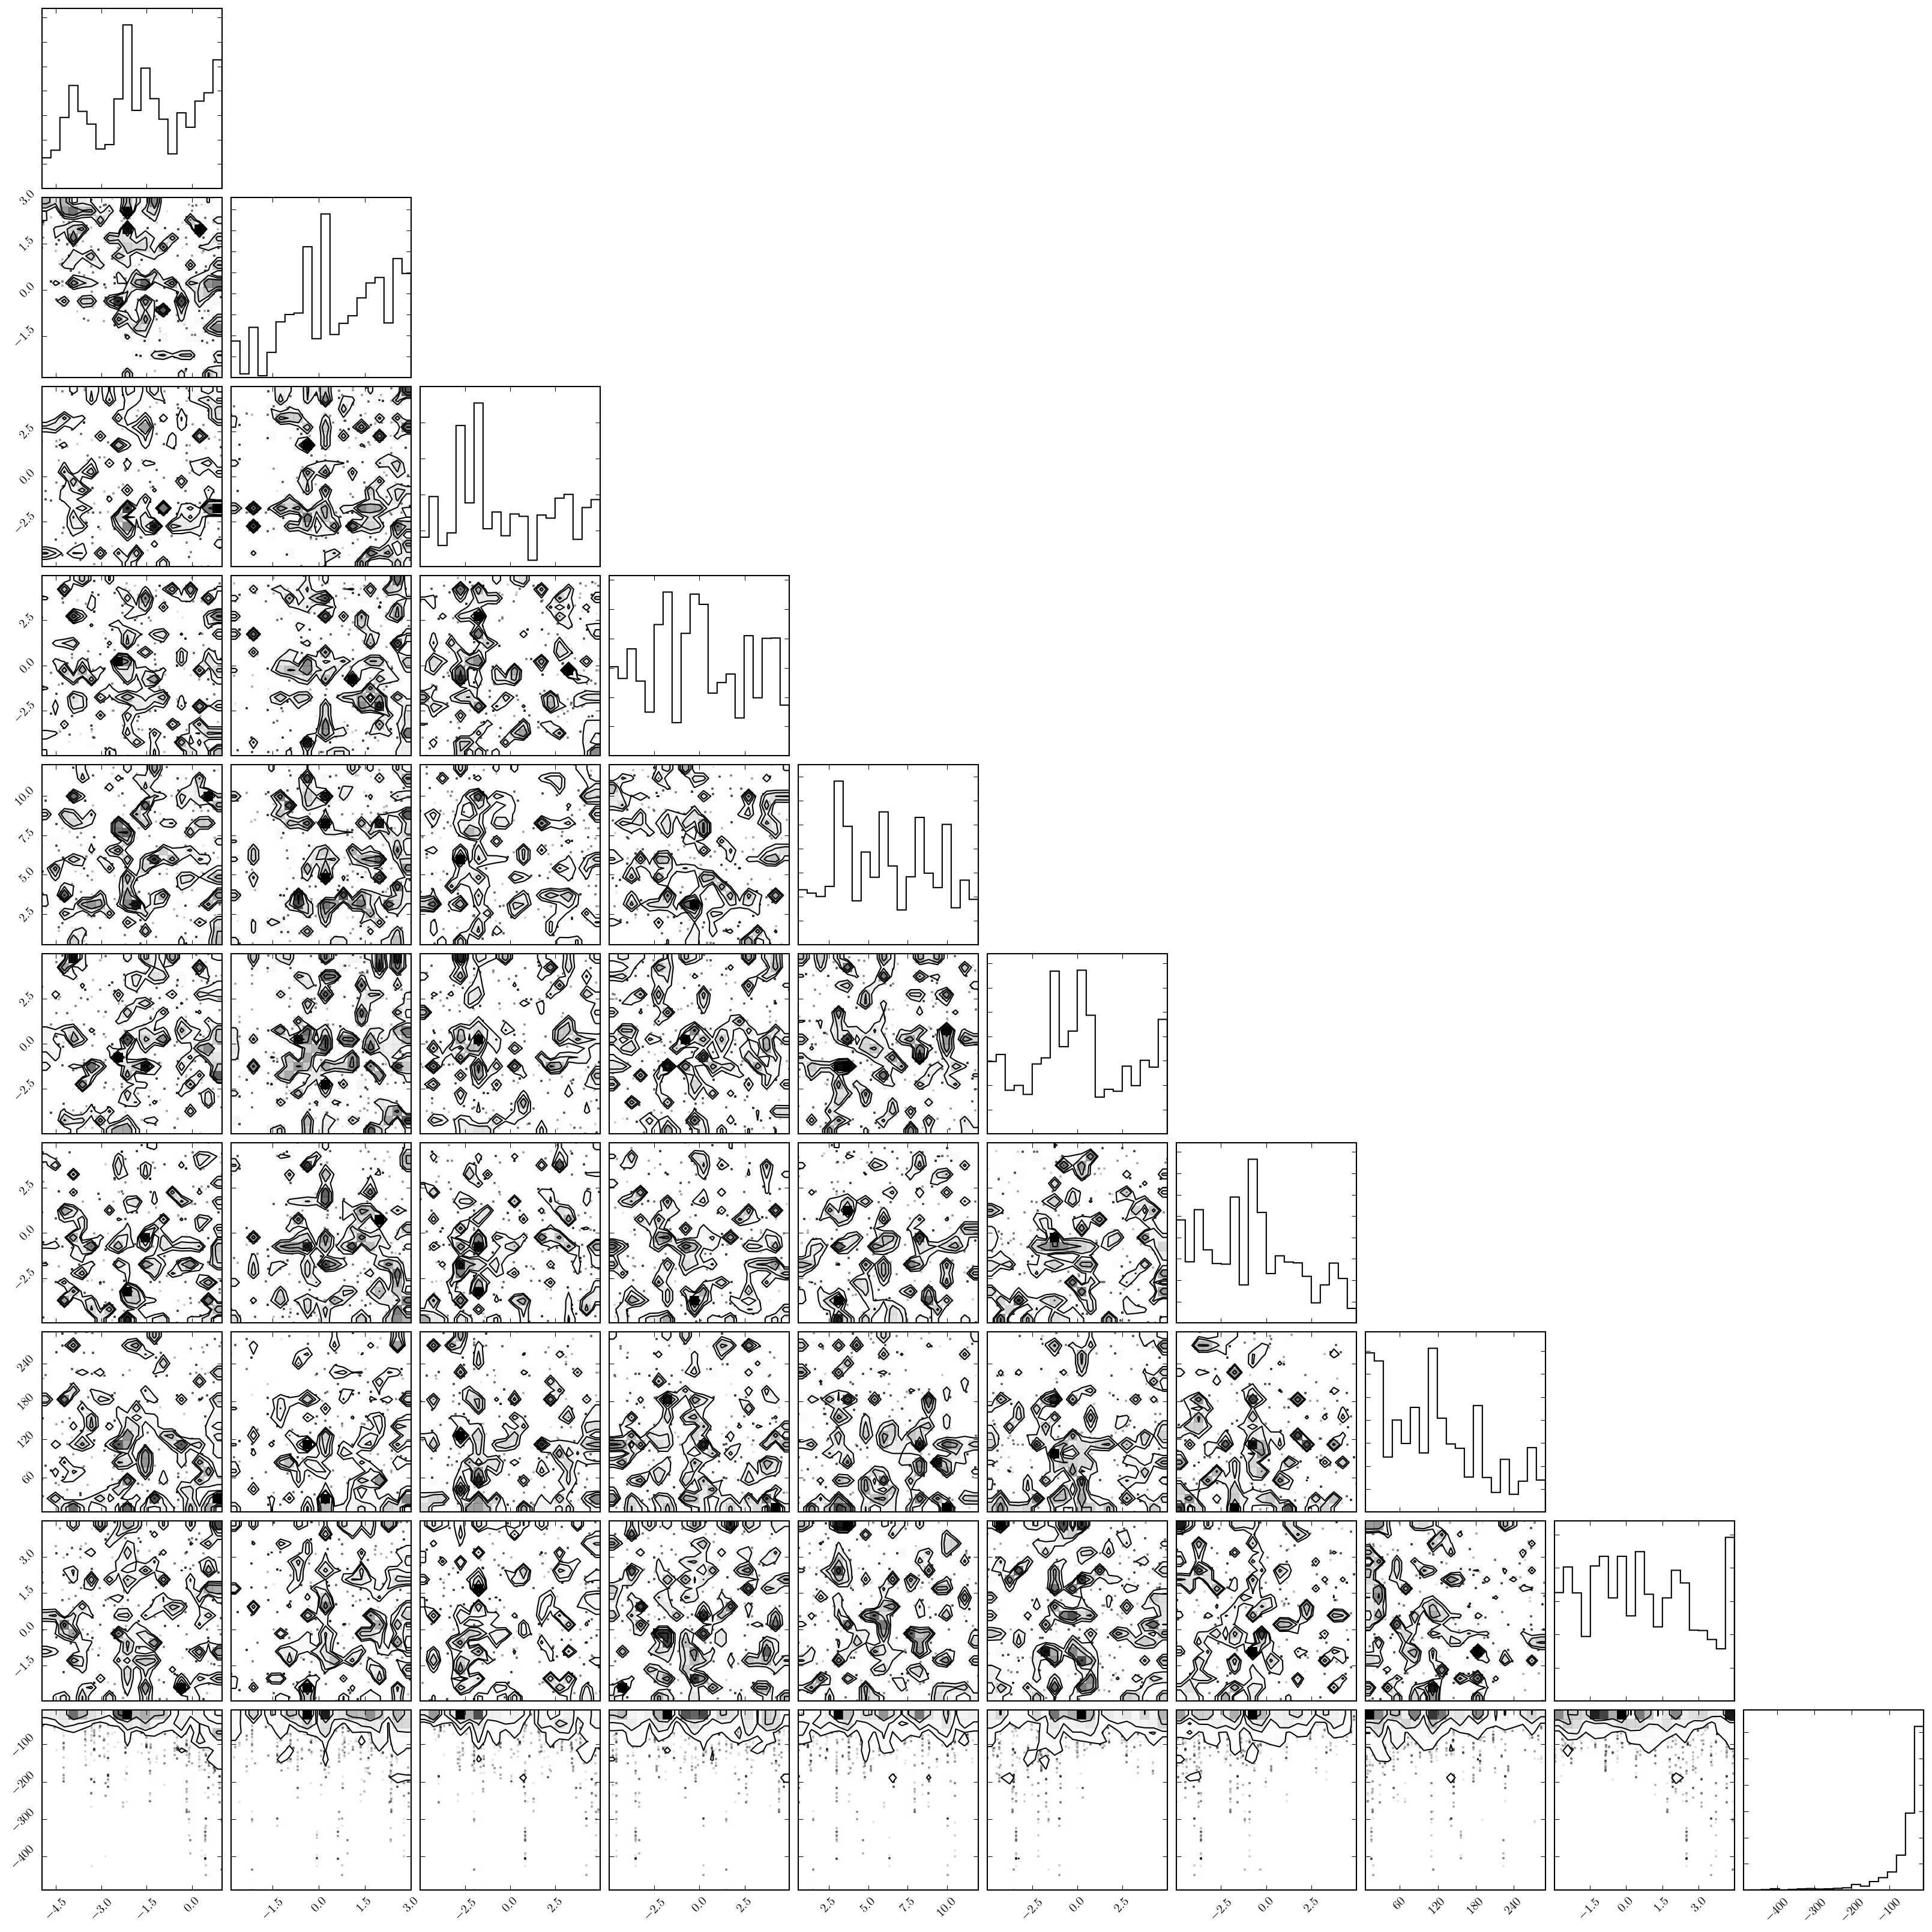

In [36]:
import corner
samples = np.concatenate((
    thetas.reshape((-1, thetas.shape[-1])), nlds.flatten()[:, None]
), axis=1)
corner.corner(samples);

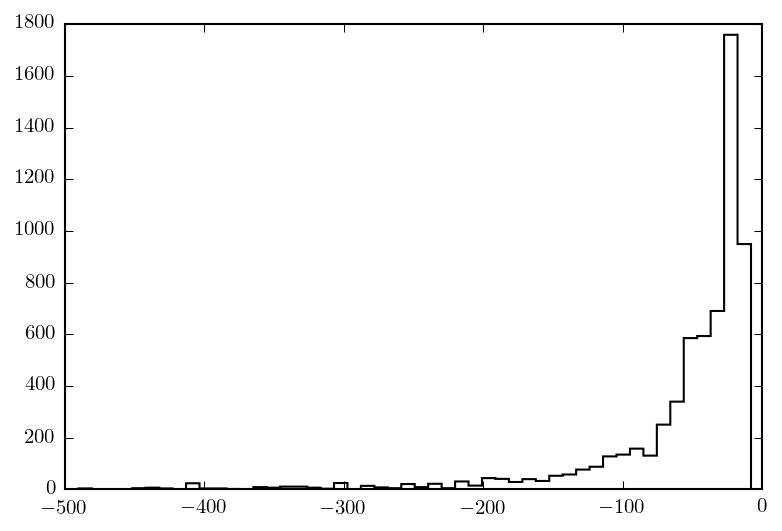

In [37]:
pl.hist(nlds.flatten(), 50, histtype="step", color="k");